In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

*импорт необходимых инструментов и библиотек*

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170M/170M [00:06<00:00, 28.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


*```def imshow(img):``` - определяет функцию с названием ```imshow```, для отображения изображений, функция принимает одно изображение в формате тензеров от pytorch* 

*```img = img / 2 + 0.5``` - восстанавливаем формат пикселей в исходное состояние после нормализации*

*```npimg = img.numpy()``` - переобразуем разнормализованное изображение в обьект numpy, для корректной работой с библиотекой ```matpolib```*

*```plt.imshow(np.transpose(npimg, (1, 2, 0)))``` - меняет порядок измерений, что бы сделать данные совместимыми с ```imshow```, изменяют из условного (r,g,b) формата в (g,b, r)


*```transform = transforms.Compose([``` - создается последовательность преобразований и изменений, которые подобно шаблону будут применяться под каждое изображения*

*```transforms.ToTensor()``` - переобразует будь то pil изображение или numpy в тензор pytorch*

*```transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))``` - нормализует диапозон глубины цветов изображения на [-1, 1]*


*```batch_size = 4``` - устанавливается размер батча, если быть точнее то, то сколько изображений будут обрабатывать параллельно, каждый батч это как группа из изображений, их там могут быть от 1 и больше*


*Следом уже идут загрузчики необходимых датасетов для обучения и проведения тестов*

*После них идут классы с уже определенными названиями*

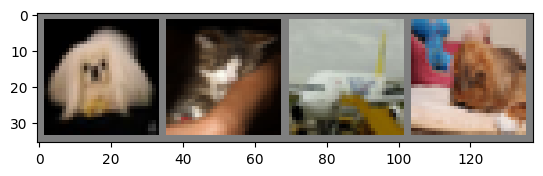

dog   cat   plane dog  


In [ ]:
# Отображение случайных изображений из тренировочного набора
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


*```dataiter = iter(trainloader)``` - инициализируем переменную, в которому в последсвтии будем итерировать тренировочные данные, разделенные на батчи, итератор, позволит последовательно извлекать эти самые батчи*

*```images, labels = next(dataiter)``` - инициализируем две переменные,  которые позволят хранить в них тензор картинки и тензор меток (классов) этих изображений*

*```imshow(torchvision.utils.make_grid(images))``` - ```.make_grid```, собирает все батчи в по порядку в одну картинку, ```imshow()```, выполняет вывод этих самых картинок*

*```print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))``` - извлекаются названия классов*

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

*```class Net(nn.Module):``` - в унициализированном классе ```Net```, мы вложили атрибут nn в виде ```nn.Module```, что позволяет нам строить архитектуру поведения нейронной модели и по своей сути, гибо настраивать все то насколько точна она будет или же отказаустойчива*

*```super().__init__()``` - здесь, мы стягиваем как раз таки возможности родительского класса*

*```conv1``` - является первым ```сверточным``` слоем, который имеет ```3``` канала на вход, что символизирует о том что это изображение формата ```RGB```, следующее, количество выходных данных которая обозначается у нас как ```6``` и размер ядра свертка, которая в нашем примере составялется 5, что символизирует о том что у нашего первого светка будет сканнер размерностью 5x5 пикселей.*

*```MaxPool2d``` - определяет максимальное значения в отдельных областях, требуется для минимизирования ущерба от уменьшения размера изображения, для более быстрой и стабильной работы с моделью. У нее имеются два атрибута, такие как первое, размер окна ```2``` и stripe или же расстояние его шага которое тоже составляет ```2```*

*```fc1``` - являются полносвязными слоями, перемножаем значения которые символизируют входные нейроны и задаем 120, в качестве количества выходных нейронов*

*```fc2``` - во втором полносвязном слое, вводим входное количество нейронов что вышло из предыдущего и задаем выходное 84*

*почему именно 120 и 84? тоже задавался этим вопросом, оказалось это просто напросто считается оптимальным решением, и в третьем ```fc3```, у нас выходное значение 10, что символизирует общее количество классов которые мы отслеживаем*

*следом, идет функция ```forward```, которая определяет то как данные будут проходить через слои нейросетей, в прямом направлении, от одного до другого конца.*

*в первых же строках, мы сразу призываем сначала первое сверточное настройку, после которой применил ```RELU```, для добавления нелинейности, оно помогает модели лучше обучаться свложным зависимостях*

*```x = torch.flatten(x, 1)``` - переобразует многомерный тензор в одномерный вектор*




In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

*```criterion``` - функция проинциализированная для определения мотерь, того насколько модель выдает разные ответы, на тренировочных и обучаемых данных*

*```optimizer``` - требуется для оптимизации и минимизирование потерь*

In [ ]:
for epoch in range(2):  # цикл по датасету несколько раз
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # получаем входные данные; data - это список из [входов, меток]
        inputs, labels = data

        # обнуляем градиенты параметров
        optimizer.zero_grad()

        # прямой + обратный проход + оптимизация
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # вывод статистики
        running_loss += loss.item()
        if i % 2000 == 1999:  # печать каждые 2000 мини-батчей
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.254
[1,  4000] loss: 1.928
[1,  6000] loss: 1.769
[1,  8000] loss: 1.639
[1, 10000] loss: 1.556
[1, 12000] loss: 1.512
[2,  2000] loss: 1.428
[2,  4000] loss: 1.404
[2,  6000] loss: 1.374
[2,  8000] loss: 1.345
[2, 10000] loss: 1.316
[2, 12000] loss: 1.298
Finished Training


*```epoch``` - является одной итерцией, где алгоритм полностью подсчитывает по заданной нами архитектуре, в нашем случае, она провернула это два раза*

*```running_loss = 0.0``` - счетчик, для накопления ошибок*

*```for i, data in enumerate(trainloader, 0):```влоежнный цикл, который проходит по всем мини батчкам из `trainloader`*

*разбиение `data`, на тензоры изображений и метки*

*`optimizer.zero_grad()` - сбрасывает градиенты перед началом очередного шага оптимизации*

*`print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')` - каждые 2000 батчей выводит среднюю ошибку*

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

*это определение названия и пути файла, куда будет сохранения нейронная модель*

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


<ipython-input-8-450da76ba5cd>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


Accuracy of the network on the 10000 test images: 54 %


*определенеи точности*

*`net = Net()` - сначала, создаем `экземпляр архитектуры` нейронной сети*

*`net.load_state_dict(torch.load(PATH))` - загружаем сохраненные веса и смещения из файла `PATH`*

*переменные correct и total, занимаются тем же что и в названиях, correct, работчет с подсчетом количества правильных предсказаний модели, следом `total`, переменная для подсчета общего количества изображений, которые проходят через модель во время тестирования*

*`with torch.no_grad():` - откалючается автоматическое вычисление градиентов*
```
    for data in testloader:
        images, labels = data
``` 
*итерация по всем ьачам тестового набора данных, data содержит два элемента*


*`correct += (predicted == labels).sum().item()` - проверка того, совпдаают ли классы, а дак же подсчитывает это самое количество совпдаений*


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Accuracy for class: plane is 49.7 %
Accuracy for class: car   is 74.6 %
Accuracy for class: bird  is 30.7 %
Accuracy for class: cat   is 20.1 %
Accuracy for class: deer  is 56.1 %
Accuracy for class: dog   is 60.5 %
Accuracy for class: frog  is 60.6 %
Accuracy for class: horse is 65.4 %
Accuracy for class: ship  is 79.1 %
Accuracy for class: truck is 50.5 %
